<a href="https://colab.research.google.com/github/rahuss/Rahul-Sinha/blob/main/Imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [4]:
seed_value = 123;
np.random.seed(seed_value);
exec(open(os.path.abspath('image_common_utils.py')).read())

In [5]:
from skimage.io import imread
img_path = './elephant.png'
img = imread(img_path)
img.shape
img.size
type(img)
img.dtype

dtype('uint8')

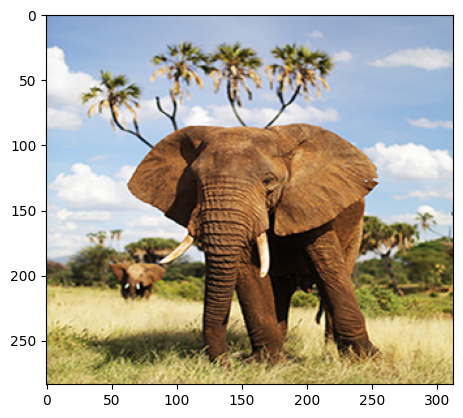

In [6]:
plt.imshow(img)
plt.show()

<class 'numpy.ndarray'>
(284, 313, 4)


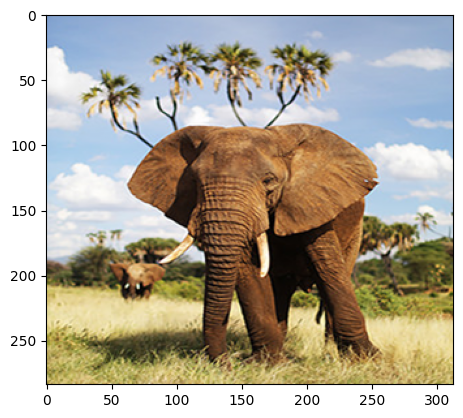

In [7]:
x = img/255
print(type(x))
print(x.shape)
plt.imshow(x)

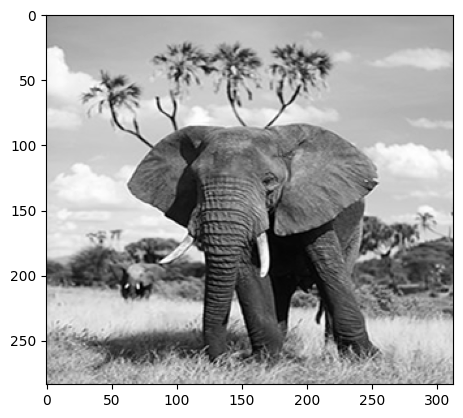

In [8]:
img = imread(img_path, as_gray=True)
img.shape
img.size
type(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

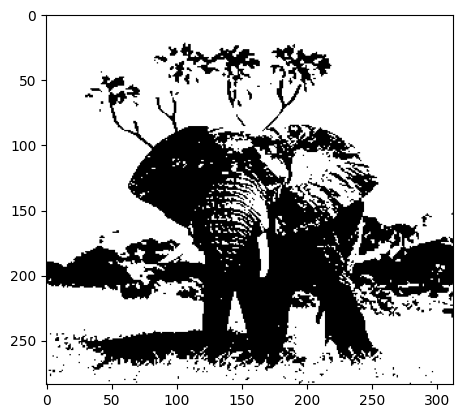

In [9]:
np.min(img)
np.max(img)
cutoff = np.max(img)/2
img[img < cutoff] = 0
img[img >= cutoff] = 1
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show

In [10]:
def iter_channels(color_image):

    for channel in np.rollaxis(color_image, -1):
        yield channel
    return

In [11]:
def match_axes_height(ax_src, ax_dst):

    plt.draw()
    dst = ax_dst.get_position()
    src = ax_src.get_position()
    ax_dst.set_position([dst.xmin, src.ymin, dst.width, src.height])
    return

In [12]:
def match_axes_height(ax_src, ax_dst):

    plt.draw()
    dst = ax_dst.get_position()
    src = ax_src.get_position()
    ax_dst.set_position([dst.xmin, src.ymin, dst.width, src.height])
    return

In [13]:
def plot_cdf(image, ax=None):
    img_cdf, bins = exposure.cumulative_distribution(image)
    ax.plot(bins, img_cdf, 'r')
    ax.set_ylabel("Fraction of pixels below intensity")
    return

In [14]:
from skimage import data
camera = data.camera()
type(camera)
camera.shape
camera.size

262144

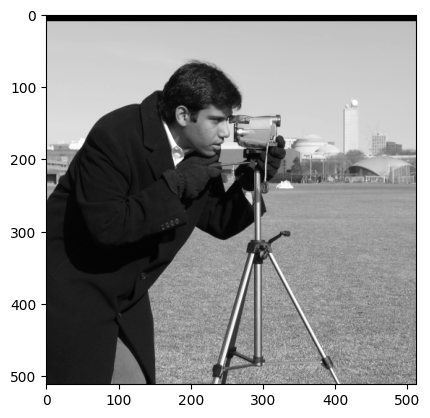

In [15]:
camera.min()
camera.max()
camera.mean()

camera[10, 20]
camera[3, 10] = 0

camera[:10] = 0

show_image(camera)

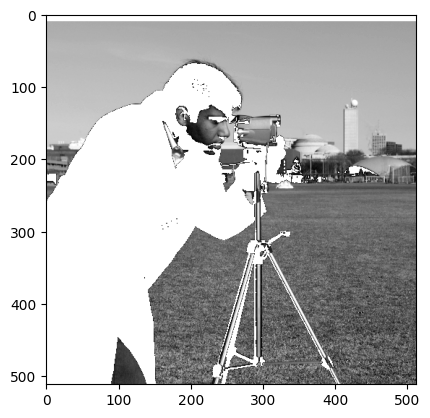

In [16]:
mask = camera < 87
camera[mask] = 255
show_image(camera)

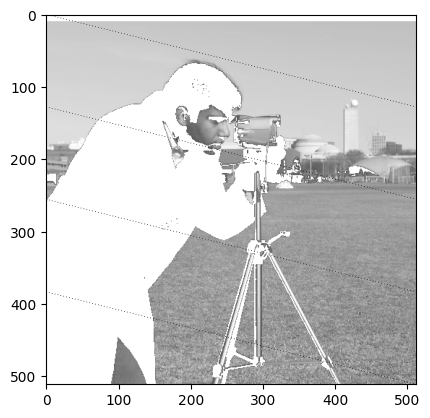

In [17]:
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0
show_image(camera)

In [18]:
nrows, ncols = camera.shape

row, col = np.ogrid[:nrows, :ncols]

row.shape, col.shape
len(row), len(col[0])

(512, 512)

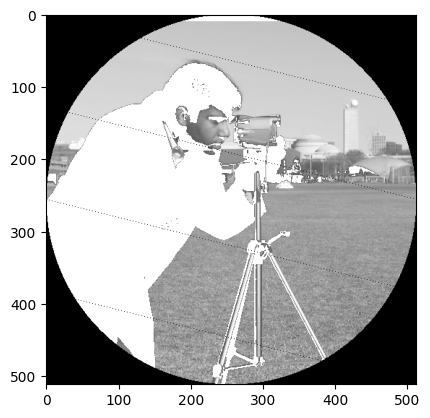

In [19]:
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
show_image(camera)

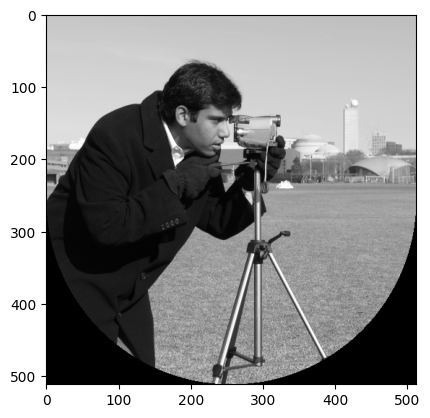

In [20]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)


camera = data.camera()
camera[lower_half_disk] = 0
show_image(camera)

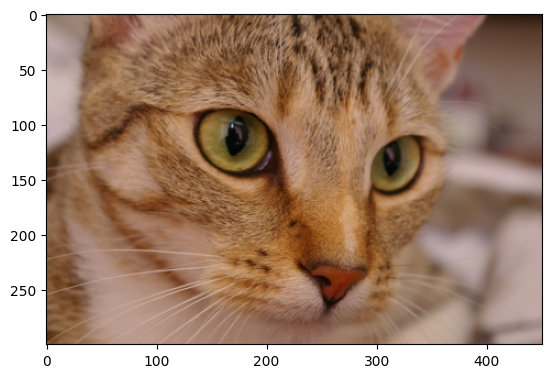

In [21]:
cat = data.chelsea()
type(cat)
cat.shape
show_image(cat, None)

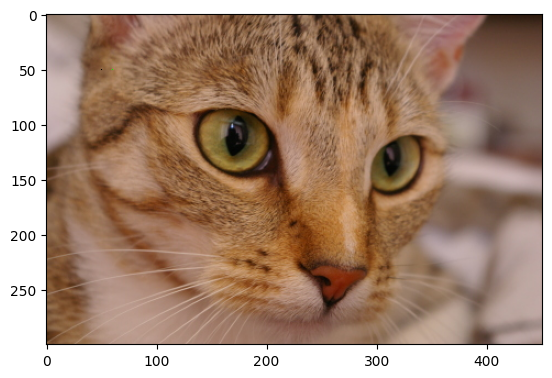

In [22]:
cat[10, 20]
cat[50, 50] = 0
cat[50, 60] = [0, 255, 0]
show_image(cat, None)

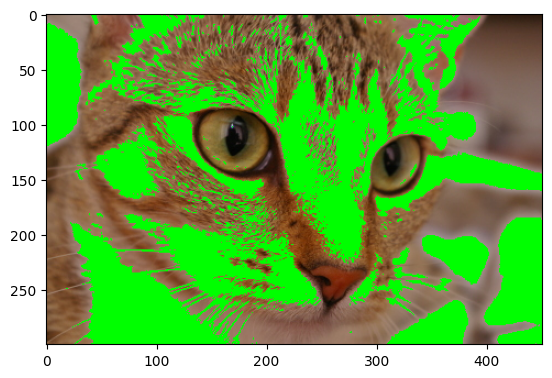

In [23]:
cat = data.chelsea()
some_threshold = cat[:, :, 0] > 160
cat[some_threshold] = [0, 255, 0]
show_image(cat, None)

In [24]:
from skimage.color import rgb2gray
from skimage import img_as_float
cat = data.chelsea()
factor_multiplication = [0.2126, 0.7152, 0.0722]
cat_manual = img_as_float(cat) @ factor_multiplication
cat_manual.shape
cat_library = rgb2gray(cat)
cat_library.shape

(300, 451)

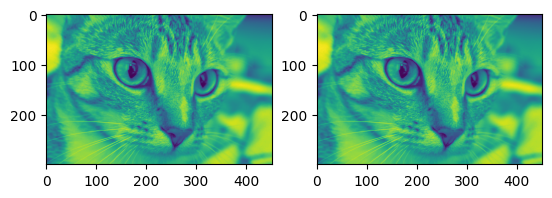

5.035552077421798e-06

In [25]:
show_image([cat_manual,cat_library], None)
np.mean(np.abs(cat_manual - cat_library))

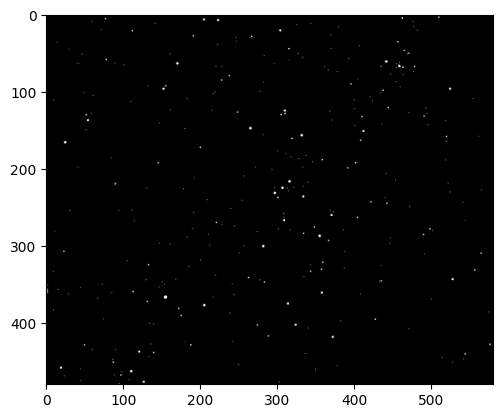

In [26]:
from skimage.io import imread
from skimage.feature import blob_log


im = imread("./wint_sky.gif", as_gray=True)
plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

In [27]:
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log.shape

(308, 3)

In [28]:
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
numrows = len(blobs_log)
print("Number of white dots counted : " ,numrows)

Number of white dots counted :  308


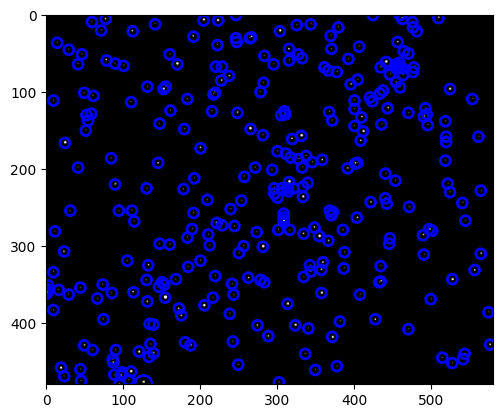

In [29]:
fig, ax = plt.subplots(1, 1)
plt.imshow(im, cmap=plt.get_cmap('gray'))
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()

In [30]:
from skimage import img_as_float, img_as_ubyte
from skimage import data

image = data.chelsea()
image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max, Shape:", image.dtype, image.min(), image.max(), image.shape)
print("type, min, max, Shape:", image_float.dtype, image_float.min(), image_float.max(), image_float.shape)
print("type, min, max, Shape:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max(), image_ubyte.shape)
print("231/255 =", 231.0/255.0)

type, min, max, Shape: uint8 0 231 (300, 451, 3)
type, min, max, Shape: float64 0.0 0.9058823529411765 (300, 451, 3)
type, min, max, Shape: uint8 0 231 (300, 451, 3)
231/255 = 0.9058823529411765


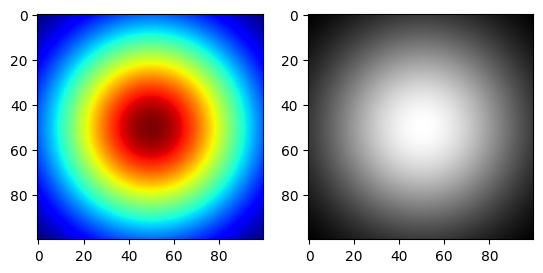

In [31]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1] # Start from -5 with step 0.1 and go till 4.9 (5 - 0.1)
R = np.exp(-(X**2 + Y**2) / 20)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray')


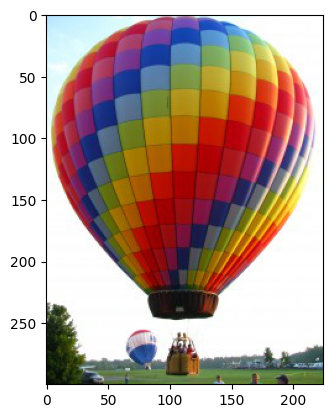

In [32]:
from skimage import io
color_image = io.imread('./balloon.jpg')
plt.imshow(color_image)
plt.show()

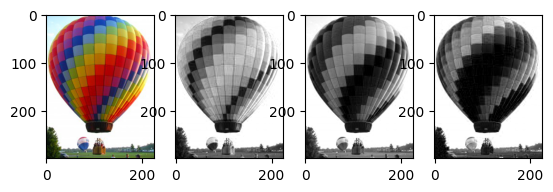

In [33]:
red_image = color_image[:, :, 0]
green_image = color_image[:, :, 1]
blue_image = color_image[:, :, 2]

show_image([color_image, red_image, green_image, blue_image], row_plot = 1)

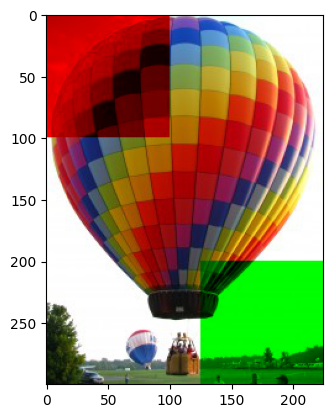

In [34]:
color_patches = color_image.copy()
color_patches[:100, :100, 1:] = 0
color_patches[-100:, -100:, (0, 2)] = 0
plt.imshow(color_patches)

In [35]:
from skimage import exposure

def _plot_histogram(ax, image, alpha=0.3):
    hist, bin_centers = exposure.histogram(image)
    ax.fill_between(bin_centers, hist, alpha=alpha)
    ax.set_xlabel('Intensity')
    ax.set_ylabel('# Pixels')
    return ax


In [36]:
from skimage import exposure

def _plot_histogram(image, ax=None):
    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        ax.hist(image.ravel(), bins=256, color='black', alpha=0.7)
    elif image.ndim == 3:
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram_channel(ax, channel, color=channel_color)
    return ax

def _plot_histogram_channel(ax, channel, color):
    ax.hist(channel.ravel(), bins=256, color=color, alpha=0.7)

    ax.set_xlabel('Intensity')
    ax.set_ylabel('Frequency')
    ax.legend(['Red', 'Green', 'Blue'])

    return ax


In [37]:
def imshow_with_histogram(image, **kwargs):
    width, height = plt.rcParams['figure.figsize']
    fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2 * width, height))

    kwargs.setdefault('cmap', plt.cm.gray)
    ax_image.imshow(image, **kwargs)

    ax_hist.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    r_hist, r_bins, _ = ax_hist.hist(image[..., 0].ravel(), bins=256, color='red', alpha=0.5)
    g_hist, g_bins, _ = ax_hist.hist(image[..., 1].ravel(), bins=256, color='green', alpha=0.5)
    b_hist, b_bins, _ = ax_hist.hist(image[..., 2].ravel(), bins=256, color='blue', alpha=0.5)

    ax_hist.set_xlabel('Intensity')
    ax_hist.set_ylabel('Frequency')

    ax_image.set_axis_off()
    match_axes_height(ax_image, ax_hist)
    return ax_image, ax_hist


(<Axes: >, <Axes: xlabel='Intensity', ylabel='Frequency'>)

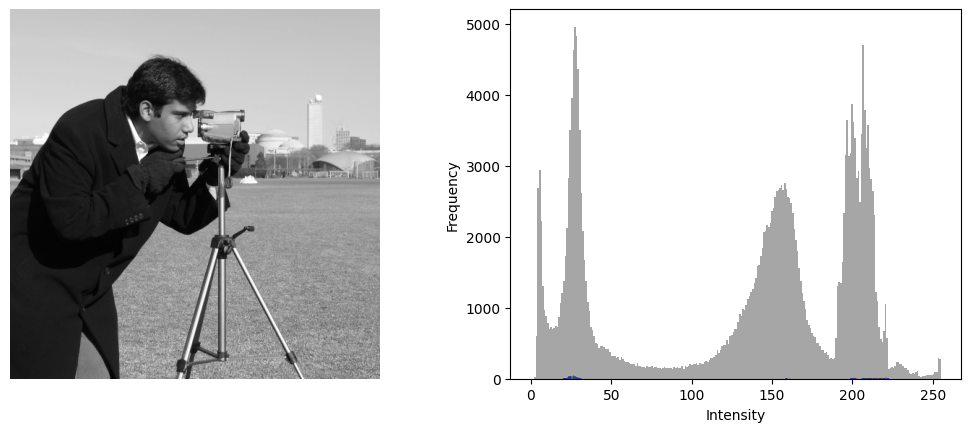

In [38]:
from skimage import data
from skimage import exposure

camera = data.camera()
imshow_with_histogram(camera)


(<Axes: >, <Axes: xlabel='Intensity', ylabel='Frequency'>)

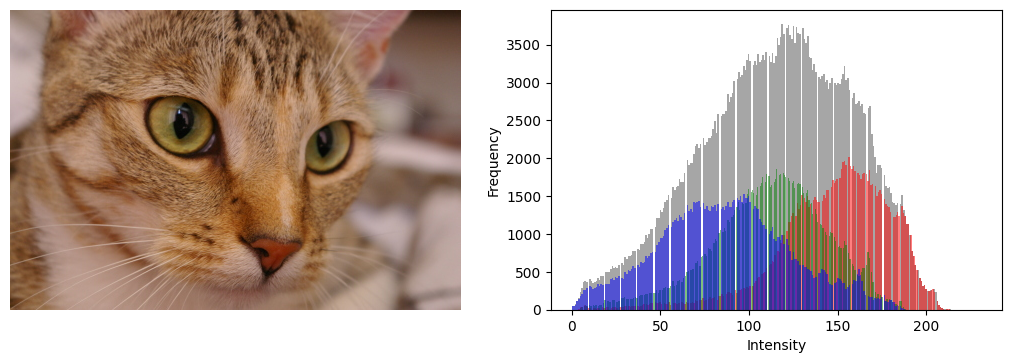

In [39]:
cat = data.chelsea()
imshow_with_histogram(cat)

(<Axes: >, <Axes: xlabel='Intensity', ylabel='Frequency'>)

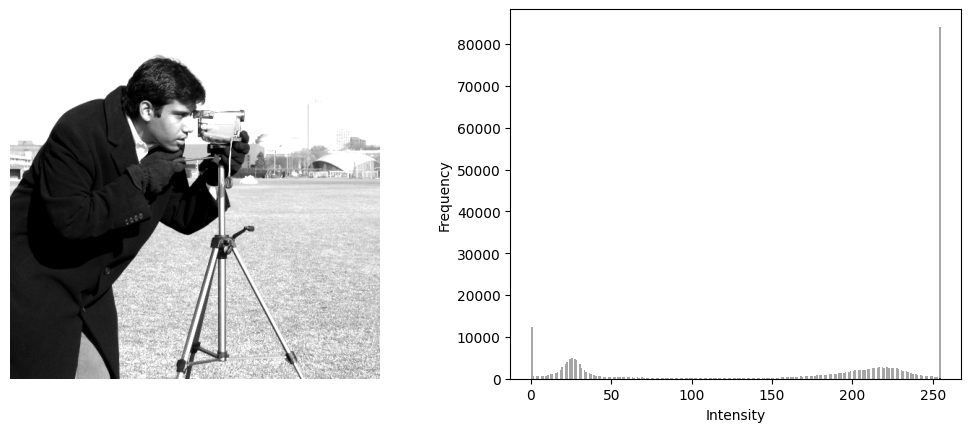

In [40]:
from skimage import exposure
high_contrast = exposure.rescale_intensity(camera, in_range=(10, 180))
imshow_with_histogram(high_contrast)

In [41]:
ax_image, ax_hist = imshow_with_histogram(camera)
plot_cdf(camera, ax=ax_hist.twinx())

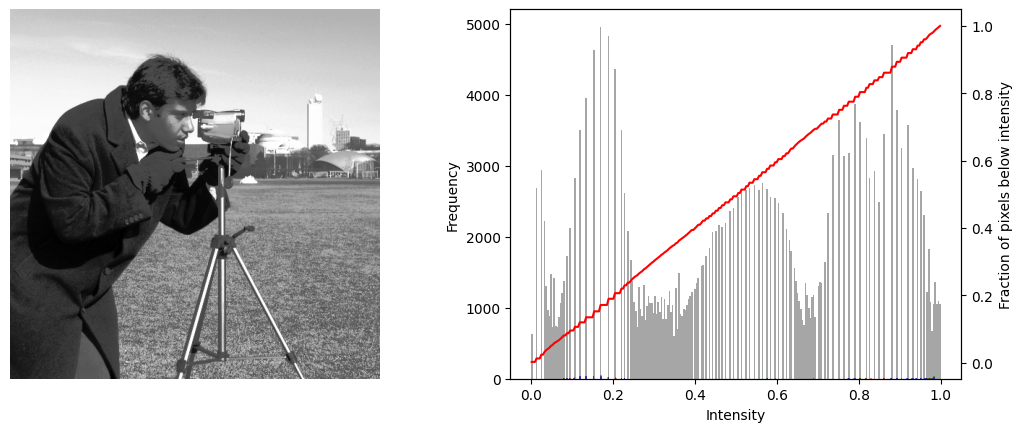

In [42]:
equalized = exposure.equalize_hist(camera)
ax_image, ax_hist = imshow_with_histogram(equalized)
plot_cdf(equalized, ax=ax_hist.twinx())

In [43]:
equalized.dtype

dtype('float64')

In [44]:
equalized = exposure.equalize_adapthist(camera)
ax_image, ax_hist = imshow_with_histogram(equalized)
plot_cdf(equalized, ax=ax_hist.twinx())
equalized.dtype

dtype('float64')

(<Axes: >, <Axes: xlabel='Intensity', ylabel='Frequency'>)

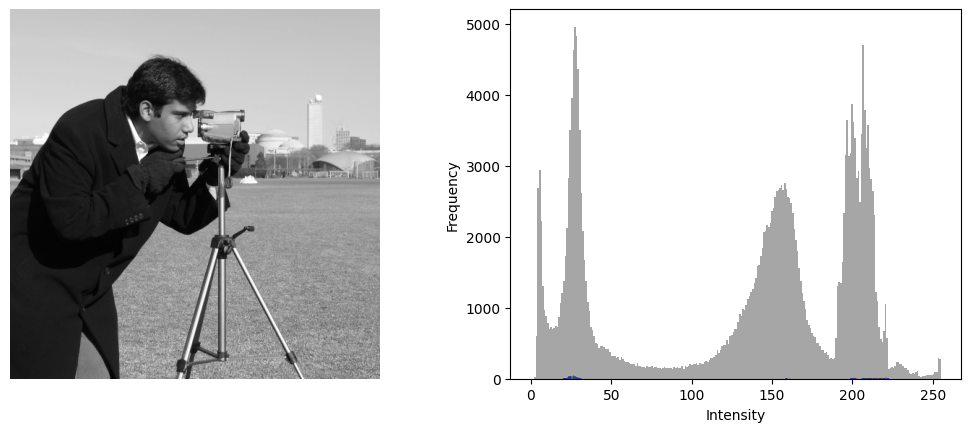

In [45]:
imshow_with_histogram(camera)

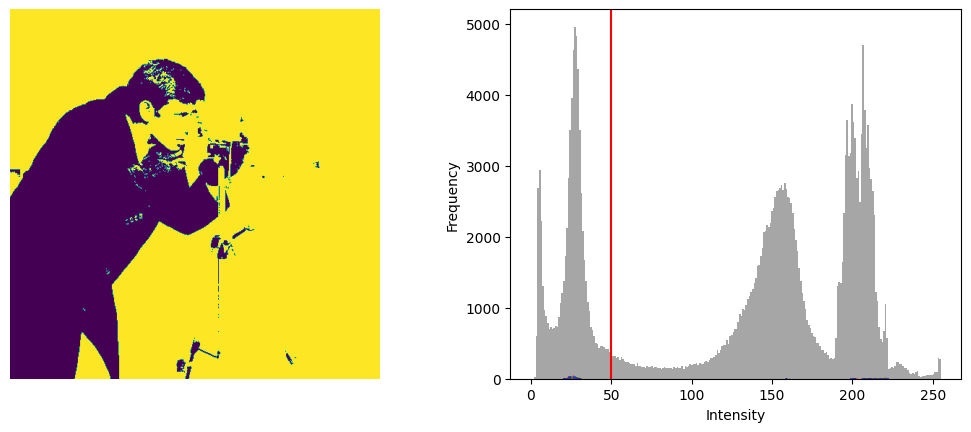

In [46]:
threshold = 50
ax_image, ax_hist = imshow_with_histogram(camera)
ax_image.imshow(camera > threshold)
ax_hist.axvline(threshold, color = 'red')

In [47]:
from skimage import filters
threshold = filters.threshold_otsu(camera)
print(threshold)

102


In [48]:
plt.imshow(camera > threshold)

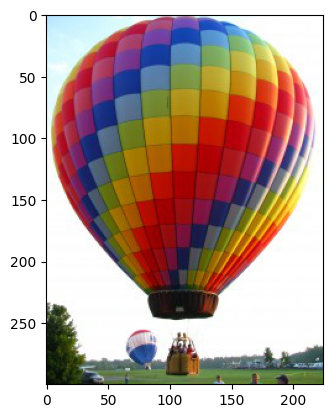

In [49]:
from skimage import color
plt.imshow(color_image)

In [50]:
lab_image = color.rgb2lab(color_image)
color_image.shape, lab_image.shape
color_image[:1,:1,:], lab_image[:1,:1,:]

(array([[[180, 227, 253]]], dtype=uint8),
 array([[[ 87.83867906,  -9.30238429, -17.53643398]]]))

In [51]:
lab_image = (lab_image + [0, 128, 128]) / [100, 255, 255]
plt.imshow(lab_image)
# plt.imshow(color.rgb2lab(lab_image))

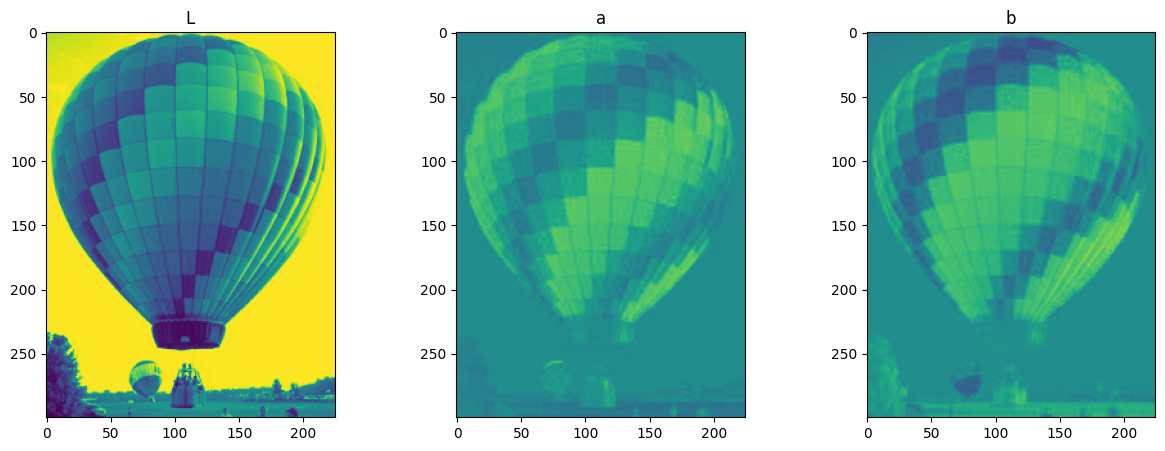

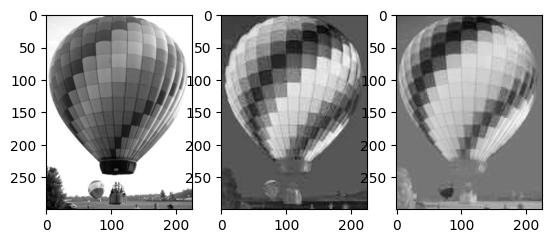

In [52]:
imshow_all(lab_image[..., 0], lab_image[..., 1], lab_image[..., 2], titles=['L', 'a', 'b'])
show_image([lab_image[..., 0], lab_image[..., 1], lab_image[..., 2]], row_plot = 1)